MINI Project

In [353]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Ignore warnings
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [354]:
#READ THE DATA
df=pd.read_csv("Train.csv")

# Data exploring & preprocessing

Item_Identifier is a unique identifier for each item.

Item_Weight is the weight of the item.

Item_Fat_Content is whether the item is "Low Fat" or "Regular".

Item_Visibility is the percentage of total display area of all products in a store allocated to the particular item.

Item_Type is the category of the item.

Item_MRP is the Maximum Retail Price (MRP) of the item.

Outlet_Identifier is a unique identifier for each outlet.

Outlet_Establishment_Year is the year in which the outlet was established.

Outlet_Size is the size of the outlet.

Outlet_Location_Type is the type of location in which the outlet is situated.

Outlet_Type is the type of outlet such as grocery store or supermarket.

Item_Outlet_Sales is the sales of the particular item in the particular outlet.

This dataset can be used for various data analysis and prediction tasks such as predicting the sales of new items, analyzing the factors that affect the sales, and identifying the best performing outlets.

In [355]:
#QUICK LOOK
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [356]:
# Histogram to know the density of any categorical data
def draw_histogram(col,plottitle,xlabel,ylabel):
  plt.figure(figsize=(30,10))
  plt.hist(df[col],edgecolor='black')
  plt.title(plottitle)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

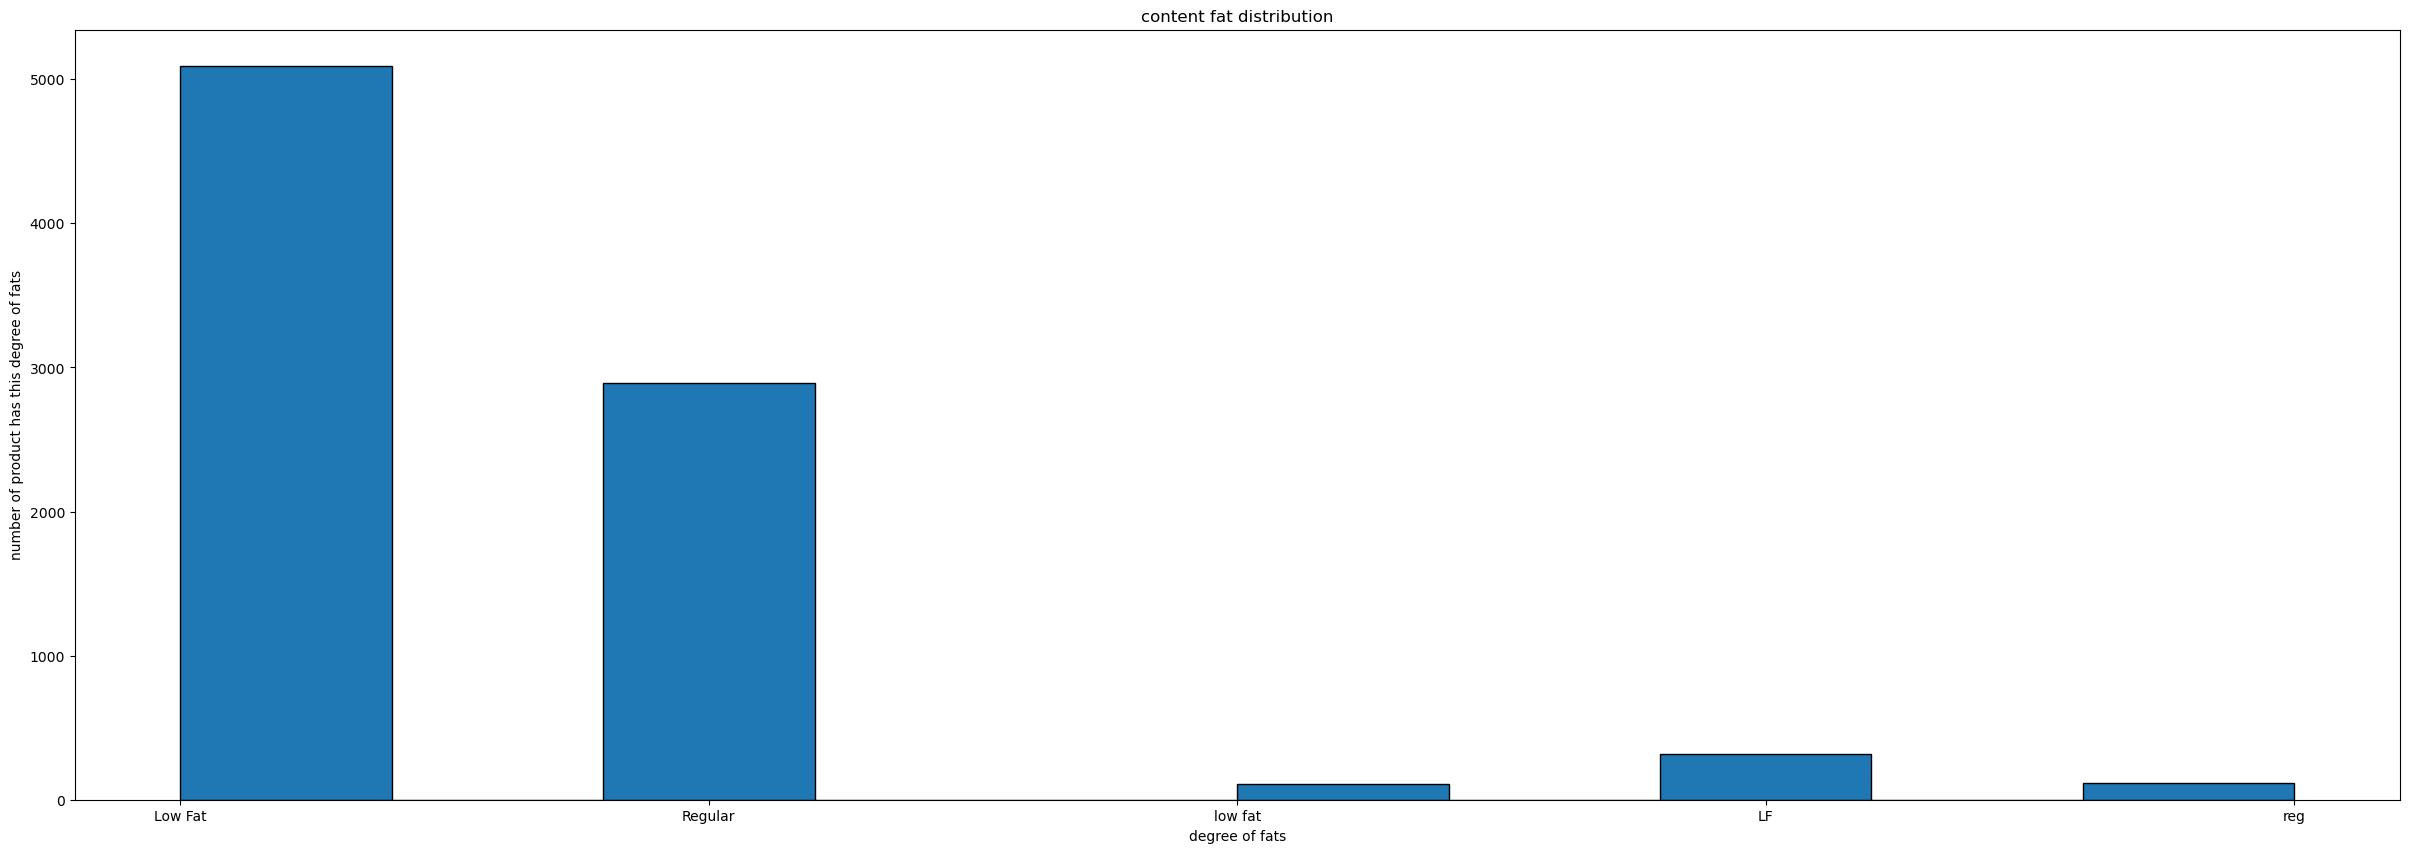

In [357]:
draw_histogram('Item_Fat_Content','content fat distribution','degree of fats','number of product has this degree of fats')

In [358]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')

In [359]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

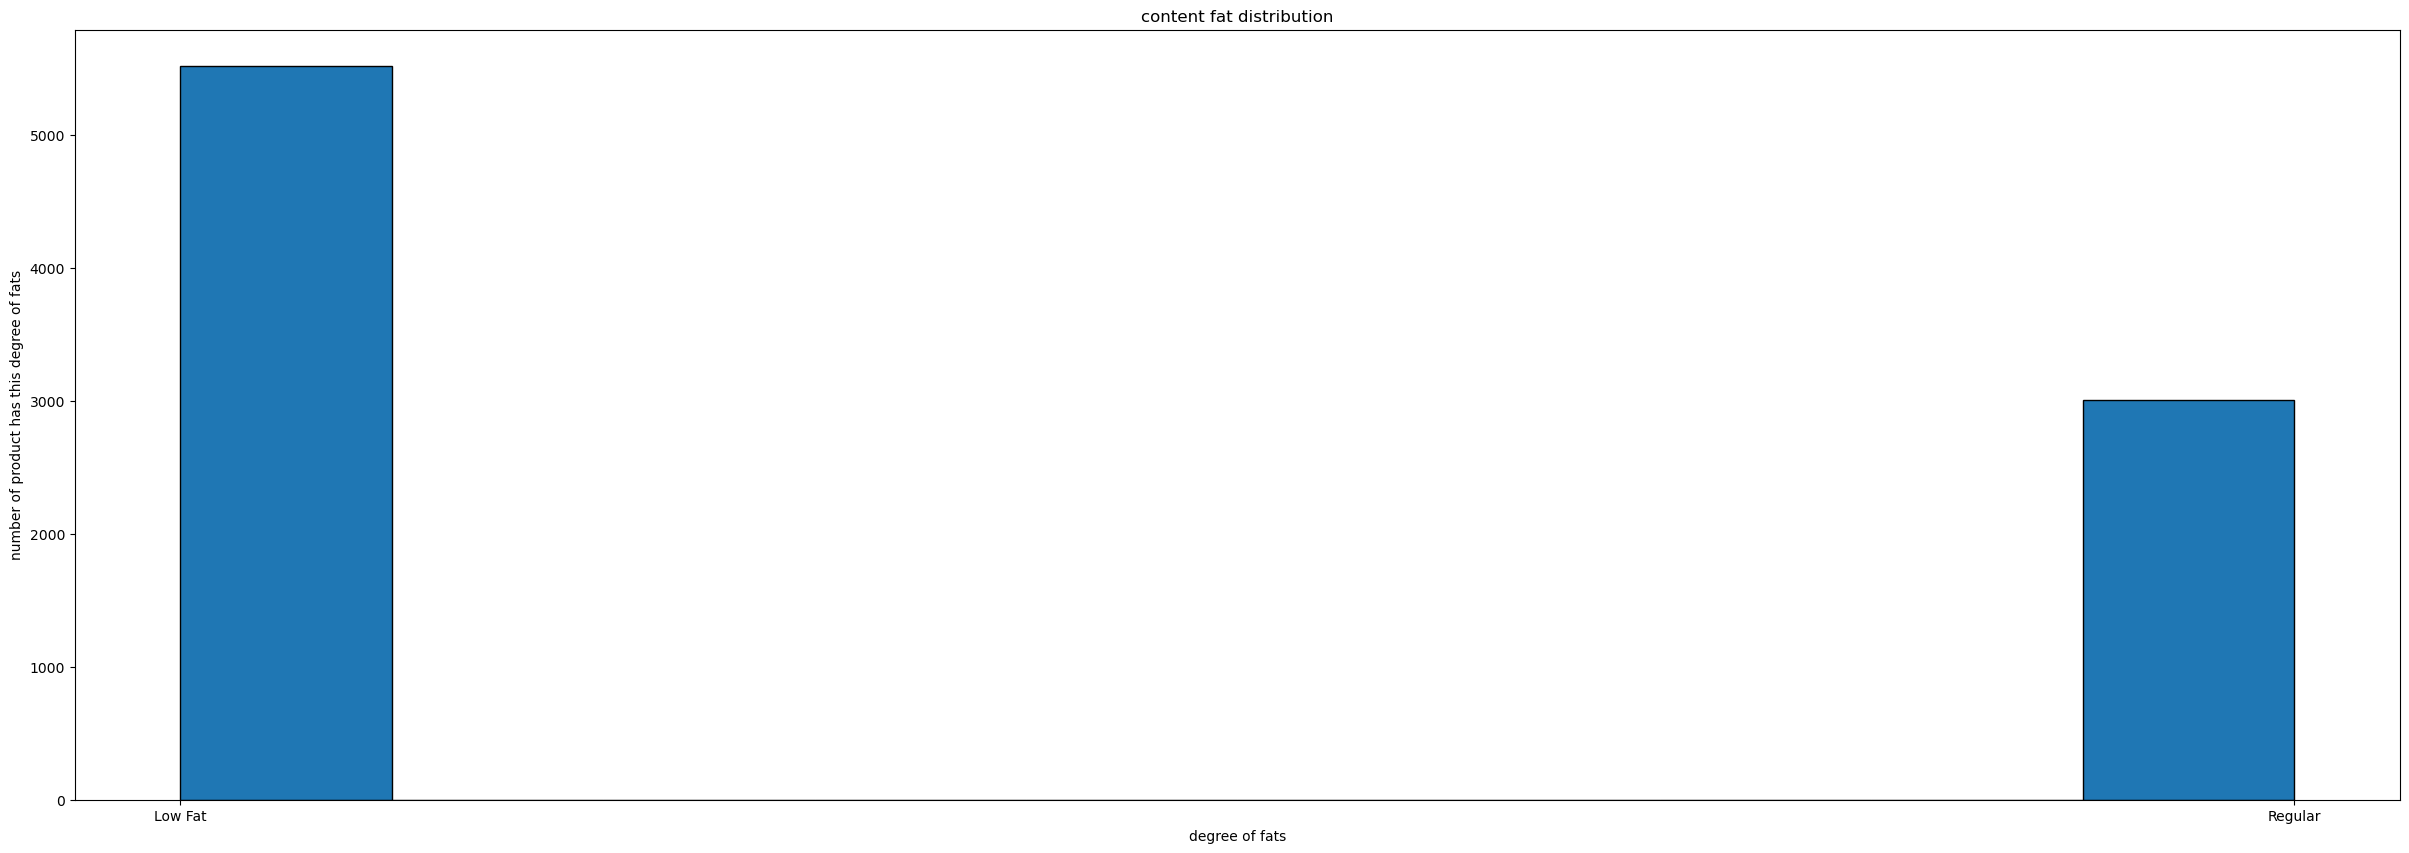

In [360]:
draw_histogram('Item_Fat_Content','content fat distribution','degree of fats','number of product has this degree of fats')

low fat products are more than regualr products


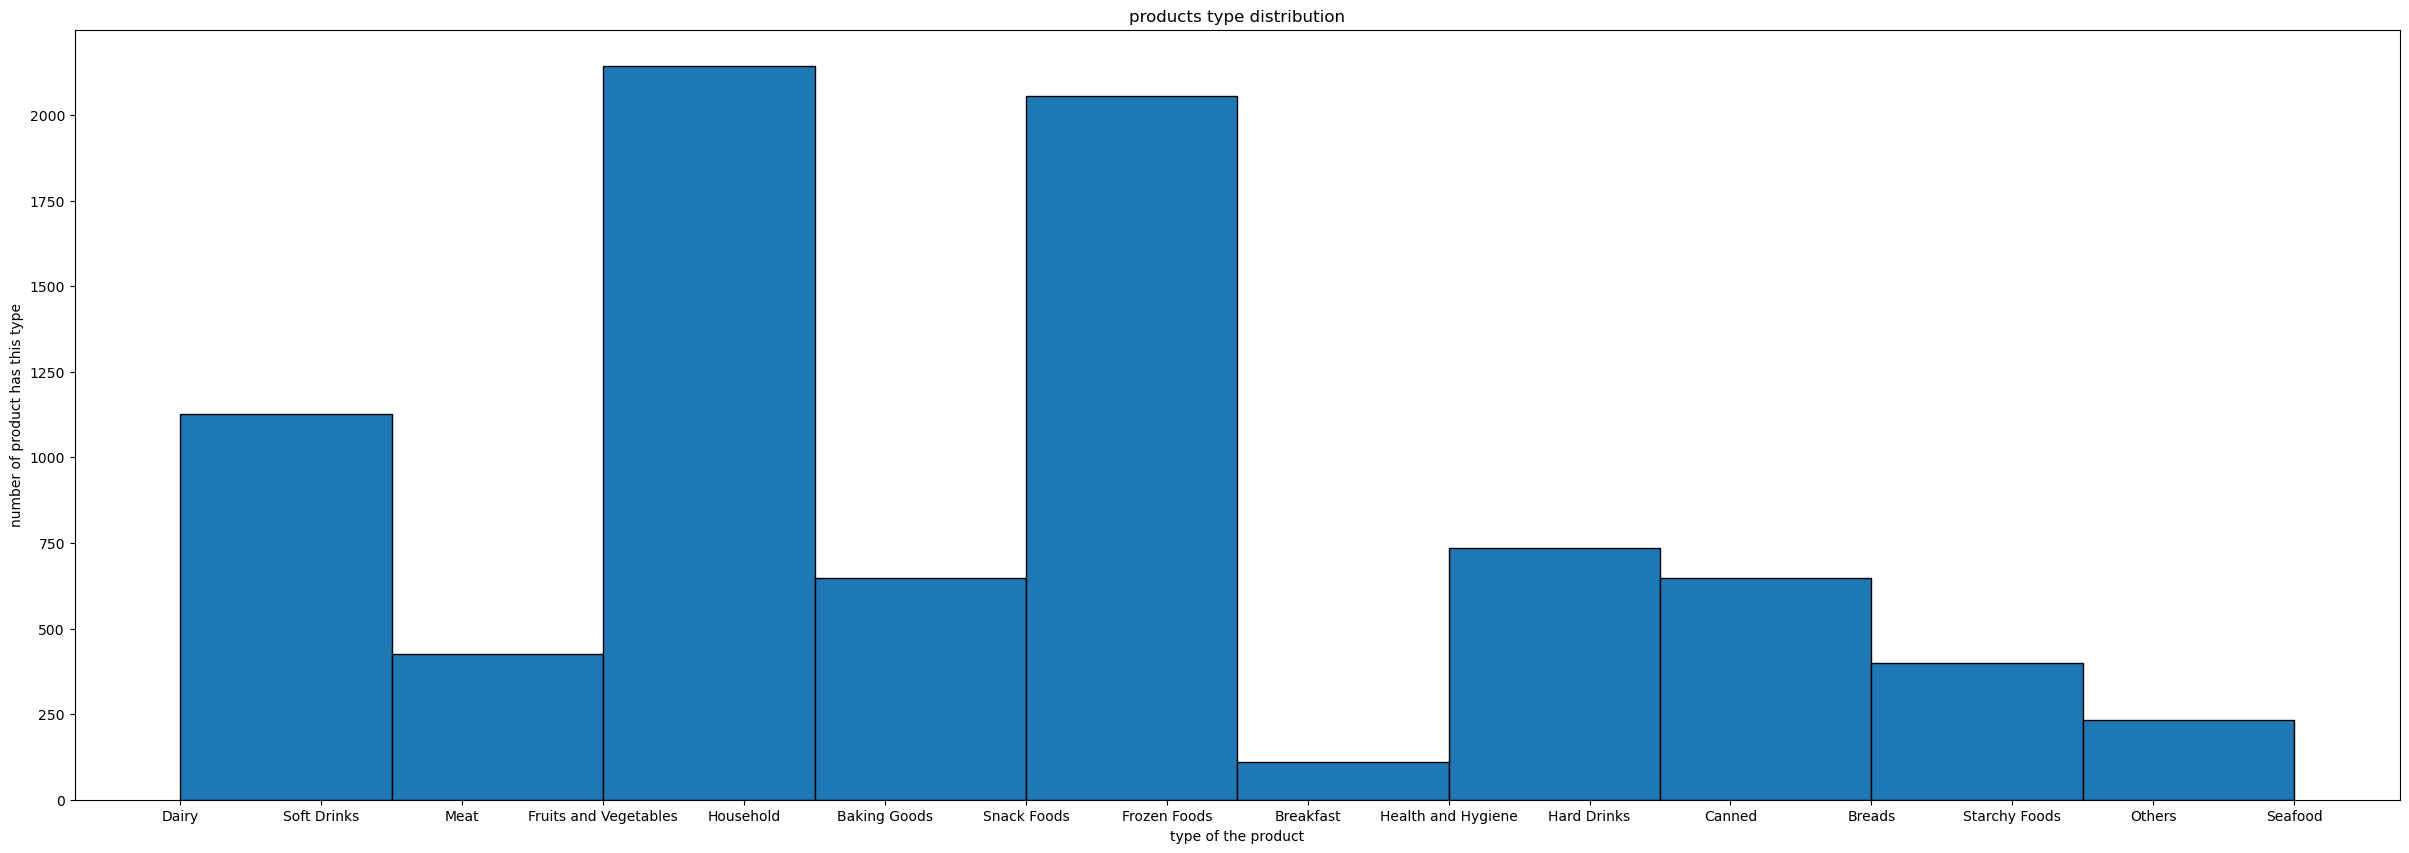

In [361]:
draw_histogram('Item_Type','products type distribution','type of the product','number of product has this type')

Highest product's types in the data ascendingly:
(meat, baking goods, dairy products)

In [362]:
def draw_boxplot(col):
  sns.boxplot(df[col]) 

def draw_scatterplot(col1,col2):
  plt.scatter(df[col1],df[col2])

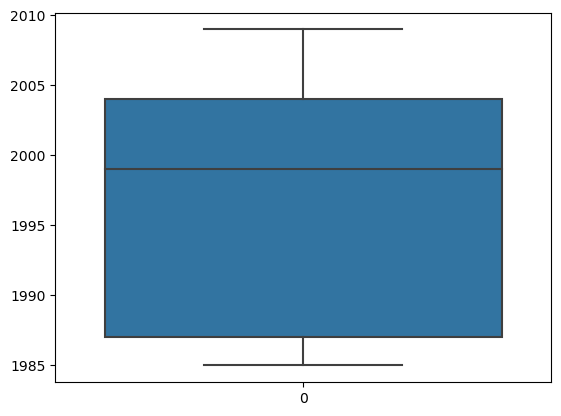

In [363]:
draw_boxplot('Outlet_Establishment_Year')

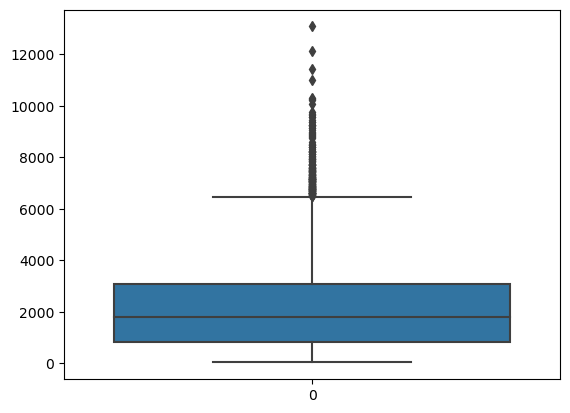

In [364]:
draw_boxplot('Item_Outlet_Sales')

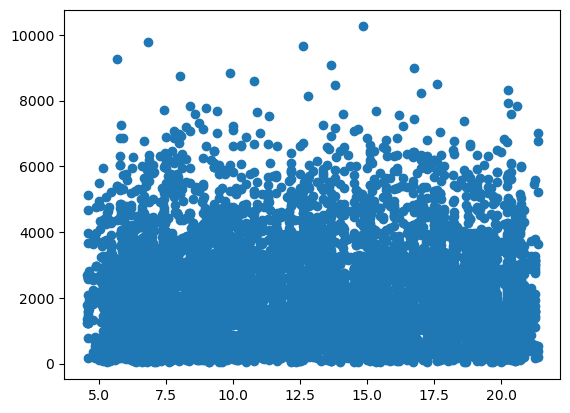

In [365]:
draw_scatterplot('Item_Weight','Item_Outlet_Sales')

There are some outliers but they don't affect the data due to different values in sale

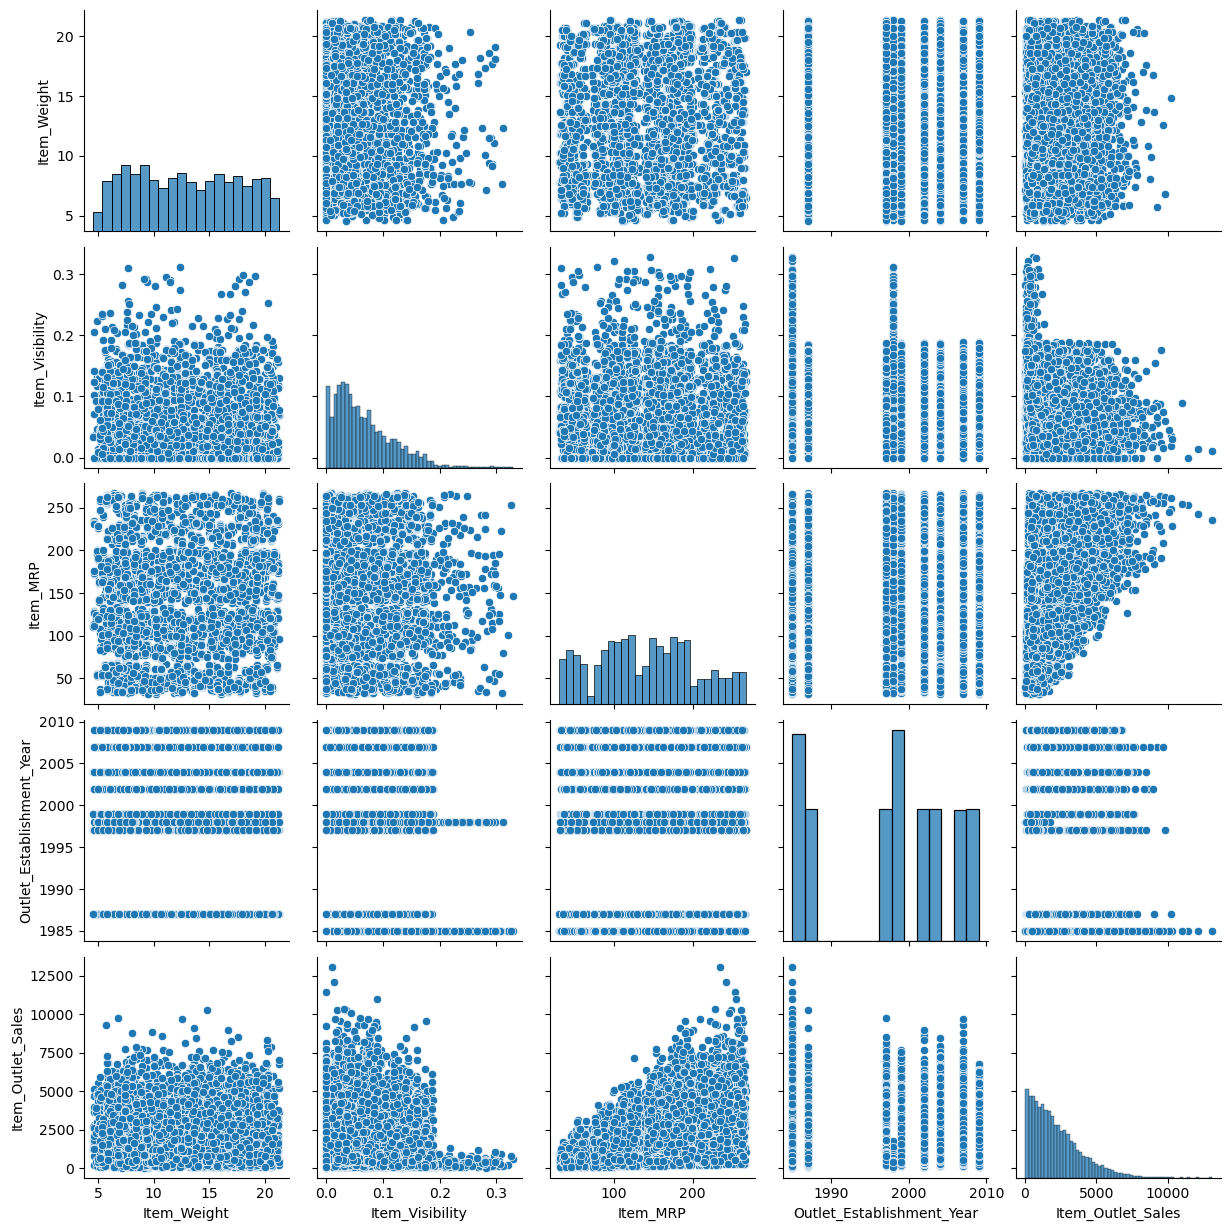

In [366]:
#Correlation using pairplot
sns.pairplot(df)

relation between all columns and sales column shows that there is no linear relation between them

In [367]:
#CHECKING THE SHAPE OF THE DATASET
df.shape

(8523, 12)

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [369]:
# Identify the duplicated rows
duplicates = df.duplicated()

# Count the number of duplicates
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


In [370]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

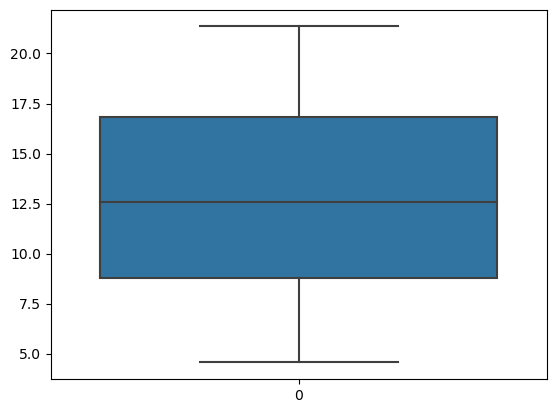

In [371]:
# have a look at the weight distribution to fill the null
draw_boxplot('Item_Weight')

In [372]:
df['Outlet_Size']=df['Outlet_Size'].fillna("NULL")

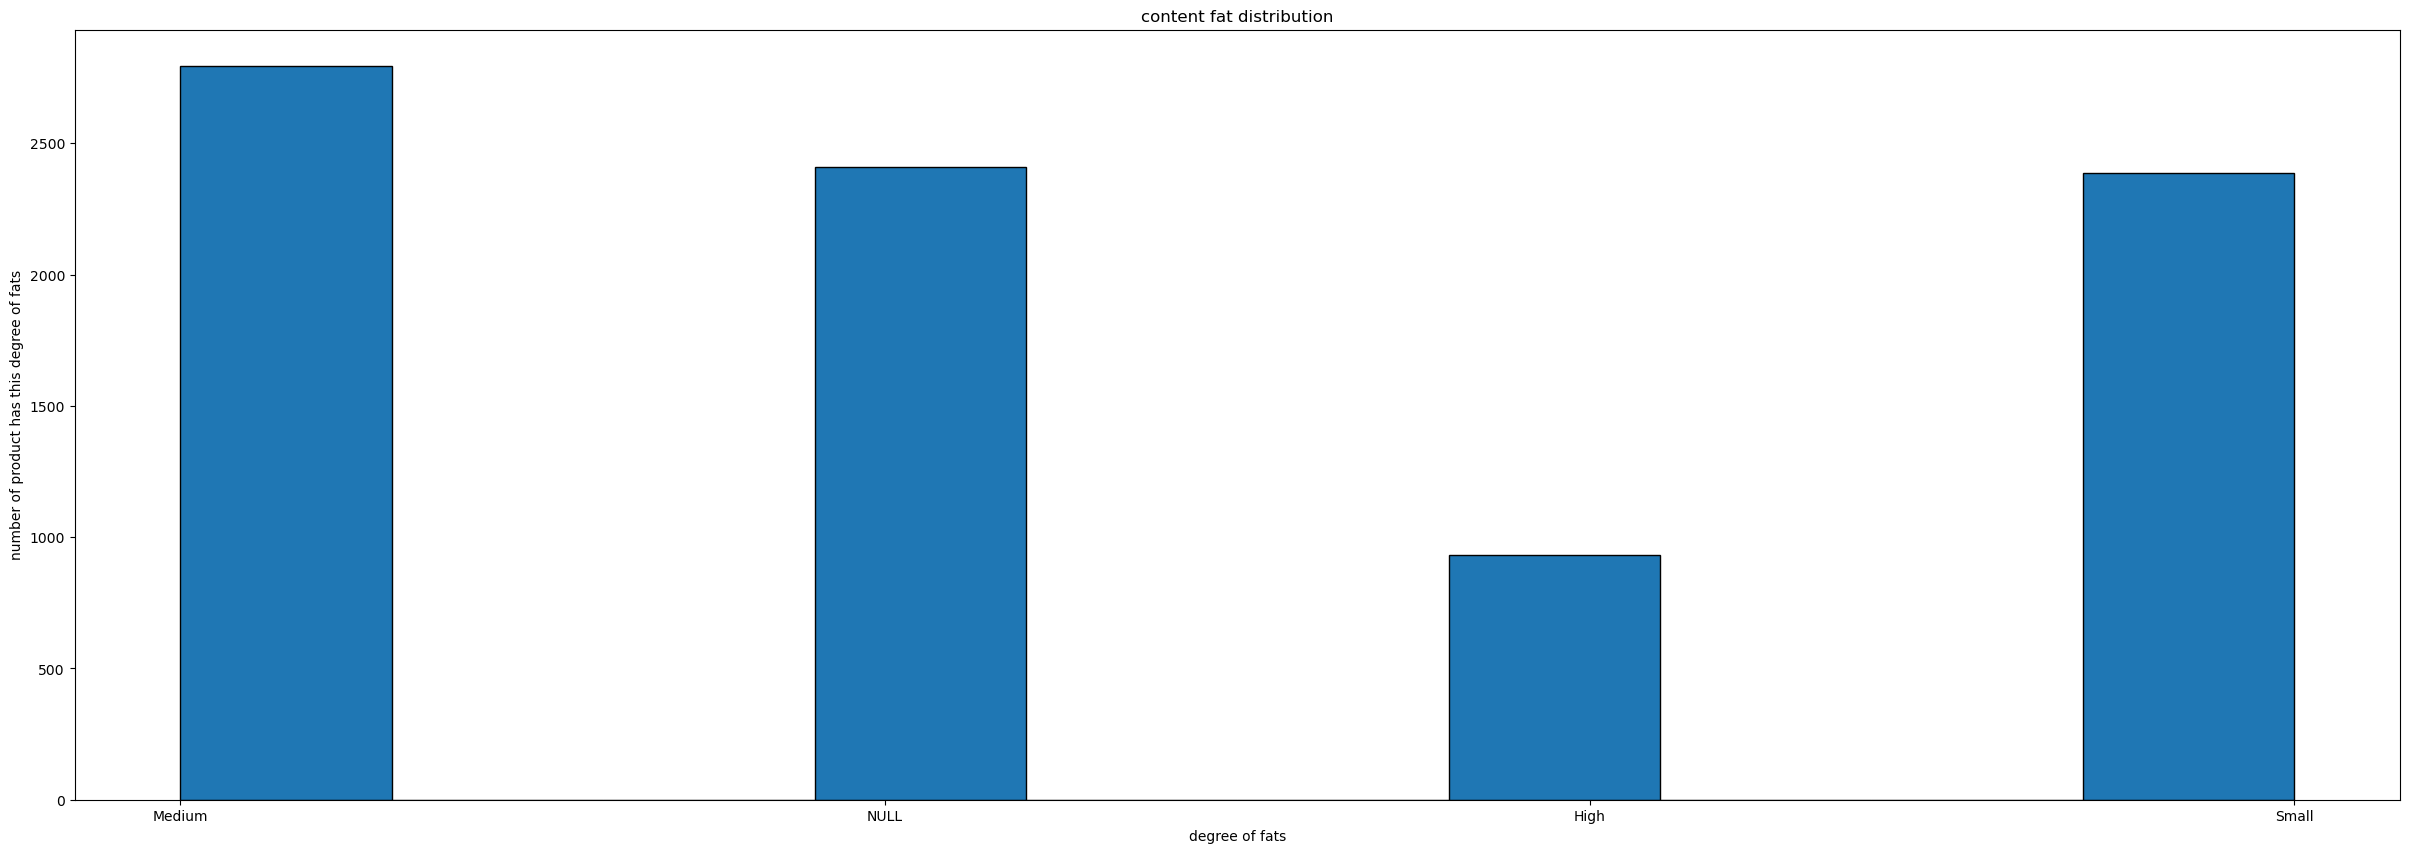

In [373]:
draw_histogram('Outlet_Size','content fat distribution','degree of fats','number of product has this degree of fats')

In [374]:
df['Outlet_Size'] = df['Outlet_Size'].fillna("Medium")
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now we will be with outliers in columns 

In [375]:
def handle_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower=Q1-(1.5*IQR)
  upper=Q3+(1.5*IQR)
  return lower , upper

In [376]:
#Correlation using heatmap
def heat_map(df):
    plt.figure(figsize=(20, 15))
    heatmap = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu",annot_kws={"fontsize":20}, vmin=-1, vmax=1)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15)
    plt.tight_layout()
    plt.show()

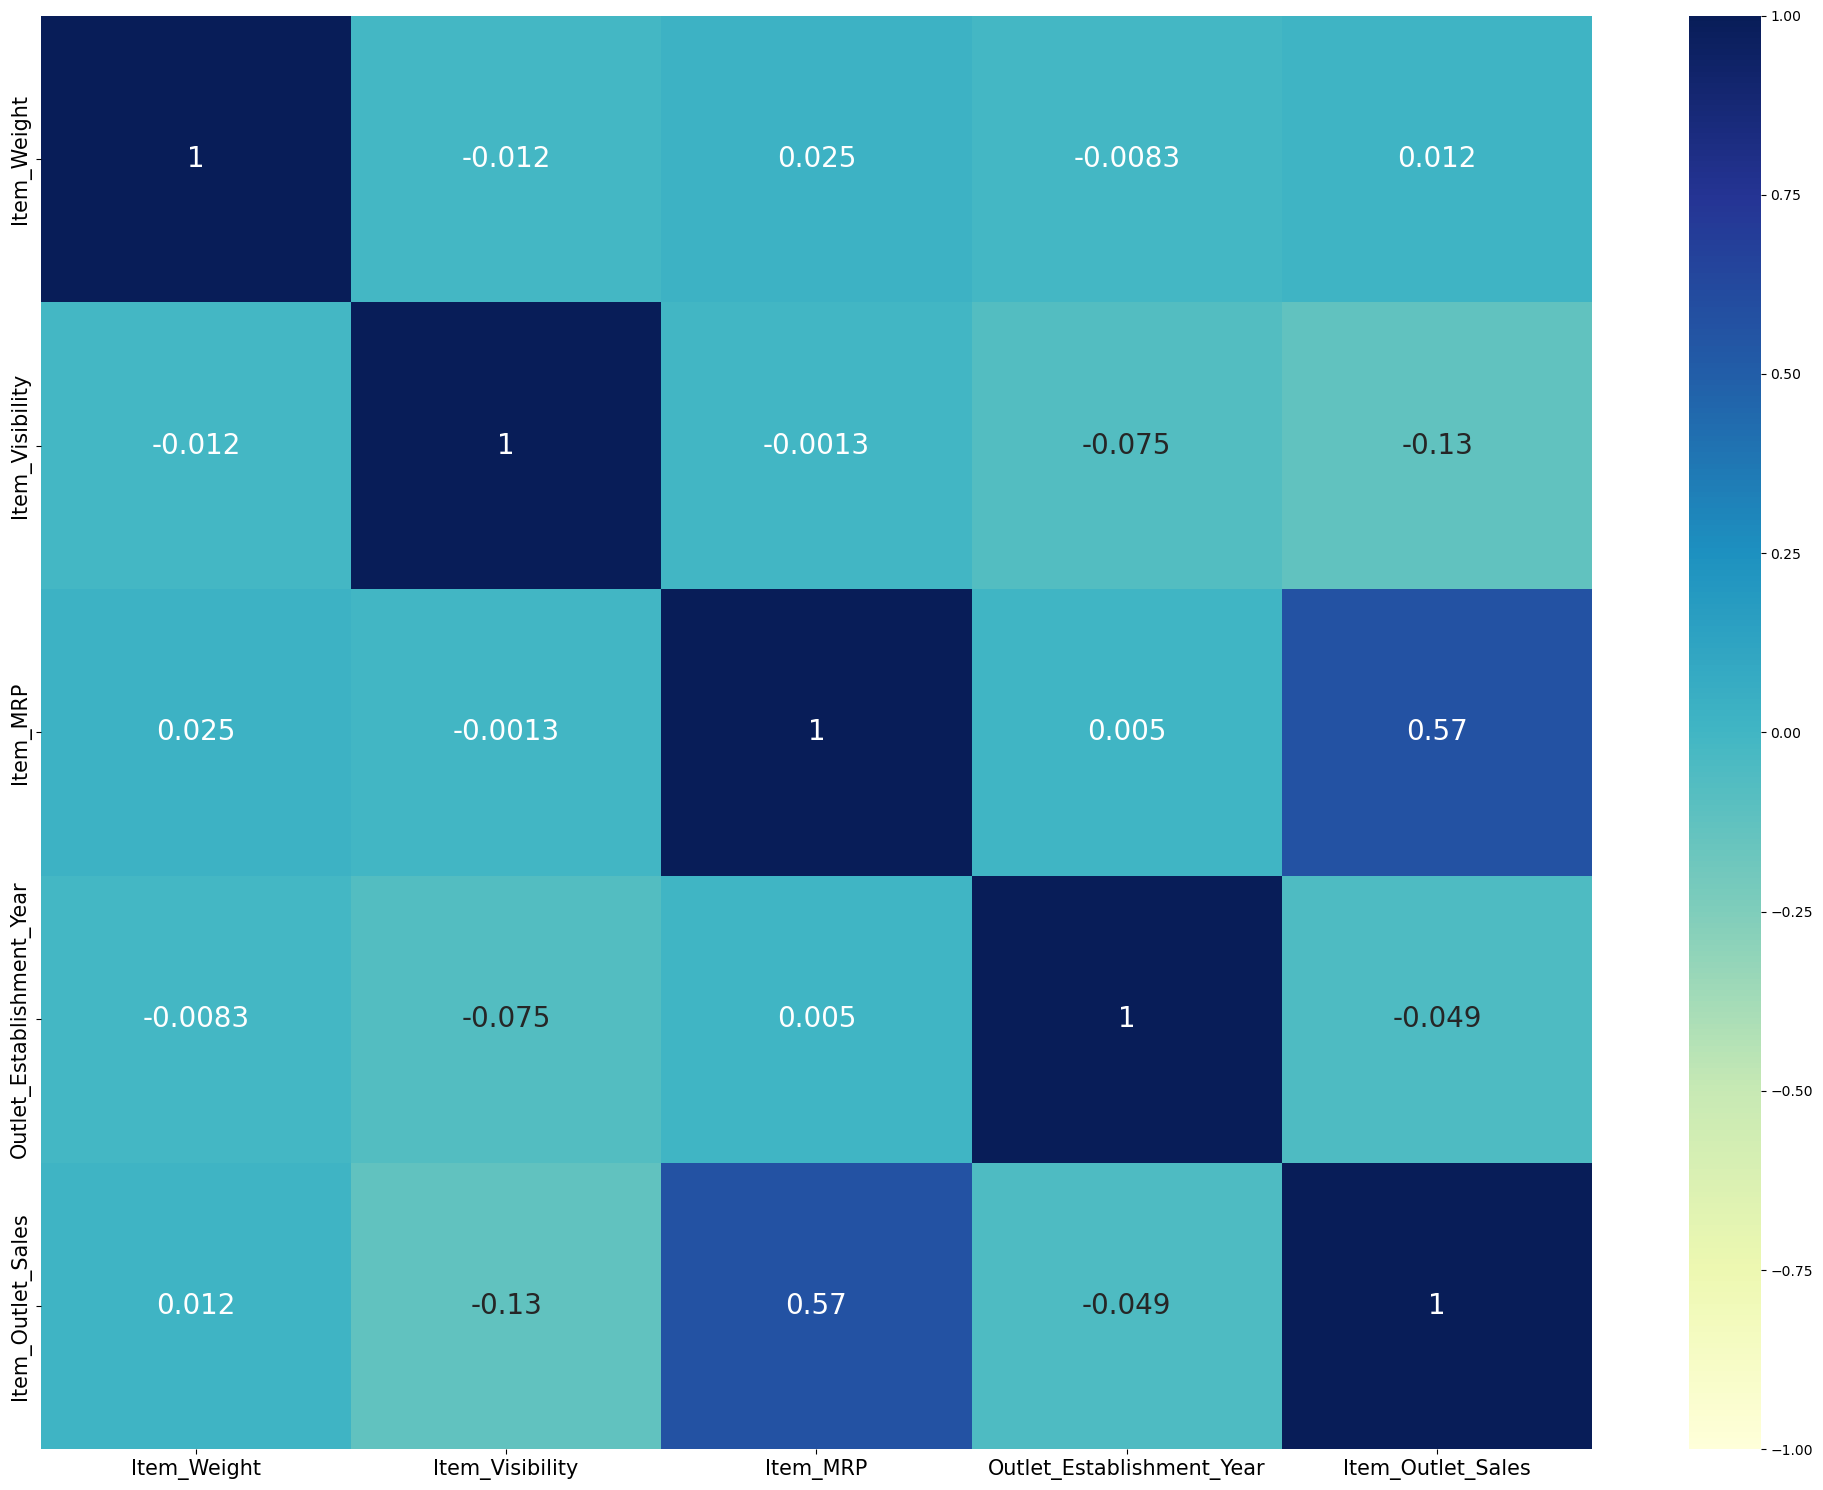

In [377]:
heat_map(df)

<Axes: >

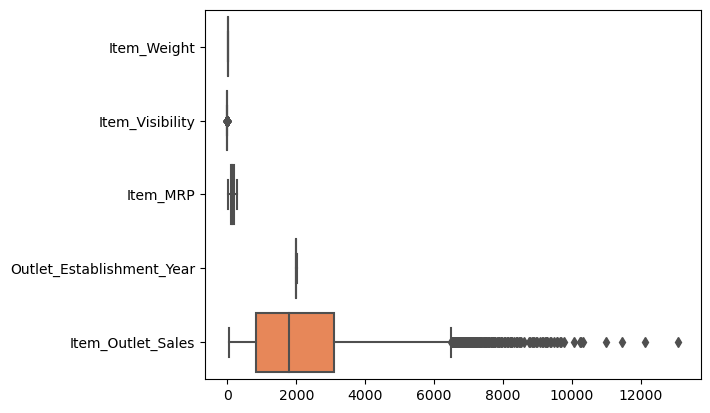

In [378]:
sns.boxplot(data=df,palette='rainbow',orient='h')

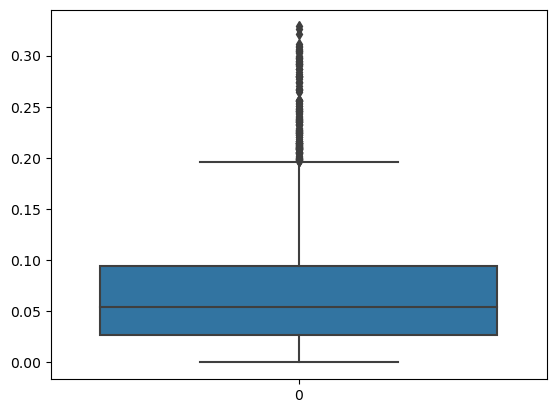

In [379]:
draw_boxplot('Item_Visibility')

In [380]:
visibility_min, visibility_max = handle_outlier(df['Item_Visibility'])
df['Item_Visibility'] = df['Item_Visibility'].clip(lower=visibility_min, upper=visibility_max)

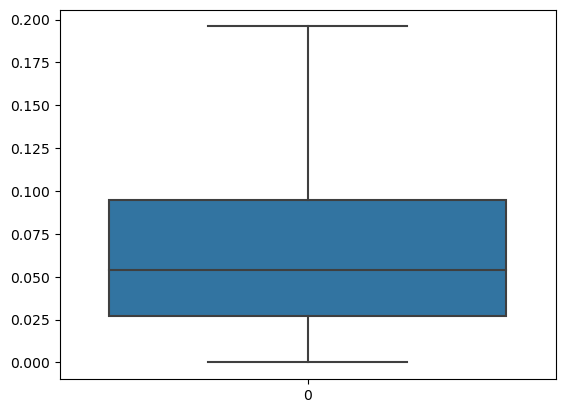

In [381]:
draw_boxplot('Item_Visibility')

Now scale the numerical data

In [382]:
from sklearn.preprocessing import StandardScaler

def scale_columns(df, columns):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[columns])
    df[columns] = scaled_data
    return df


In [383]:
df = scale_columns(df, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'])


In [384]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.841872,Low Fat,-1.008628,Dairy,1.747454,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.910601
1,DRC01,-1.641706,Regular,-0.942473,Soft Drinks,-1.489023,OUT018,2009,Medium,Tier 3,Supermarket Type2,-1.018440
2,FDN15,1.098554,Low Fat,-0.994034,Meat,0.010040,OUT049,1999,Medium,Tier 1,Supermarket Type1,-0.049238
3,FDX07,1.500838,Regular,-1.337208,Fruits and Vegetables,0.660050,OUT010,1998,NULL,Tier 3,Grocery Store,-0.849103
4,NCD19,-0.929428,Low Fat,-1.337208,Household,-1.399220,OUT013,1987,High,Tier 3,Supermarket Type1,-0.695373


In [385]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [386]:
def draw_piechart(df, col, labels):
    plt.pie(df[col].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f"{col} Distribution")
    plt.show()

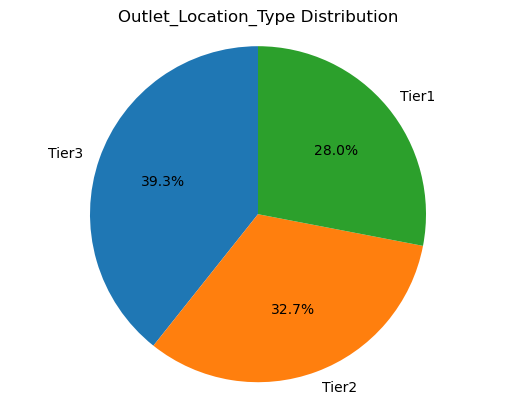

In [387]:
labels = ['Tier3', 'Tier2', 'Tier1']
draw_piechart(df, 'Outlet_Location_Type', labels)



* The dataset represents a market with outlets classified into three tiers, with Tier 3 having the highest percentage (39.3%), followed by Tier 2 (32.7%), and Tier 1 having the lowest percentage (28.0%).
* Tier classification of outlets represents the level of development and economic activity in a particular region, with Tier 1 cities being the most developed and Tier 3 cities being less developed.
* The given information suggests that the market may be located in a region with a higher proportion of less developed cities or regions.



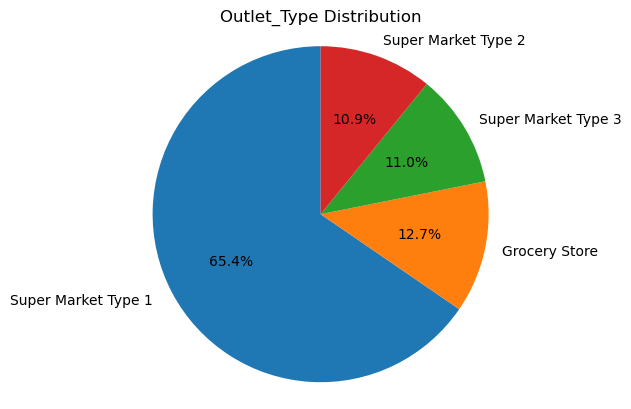

In [388]:
labels=['Super Market Type 1 ','Grocery Store', 'Super Market Type 3','Super Market Type 2' ]
draw_piechart(df,'Outlet_Type',labels)

More than half of the products in the dataset are distributed to super markets type 1

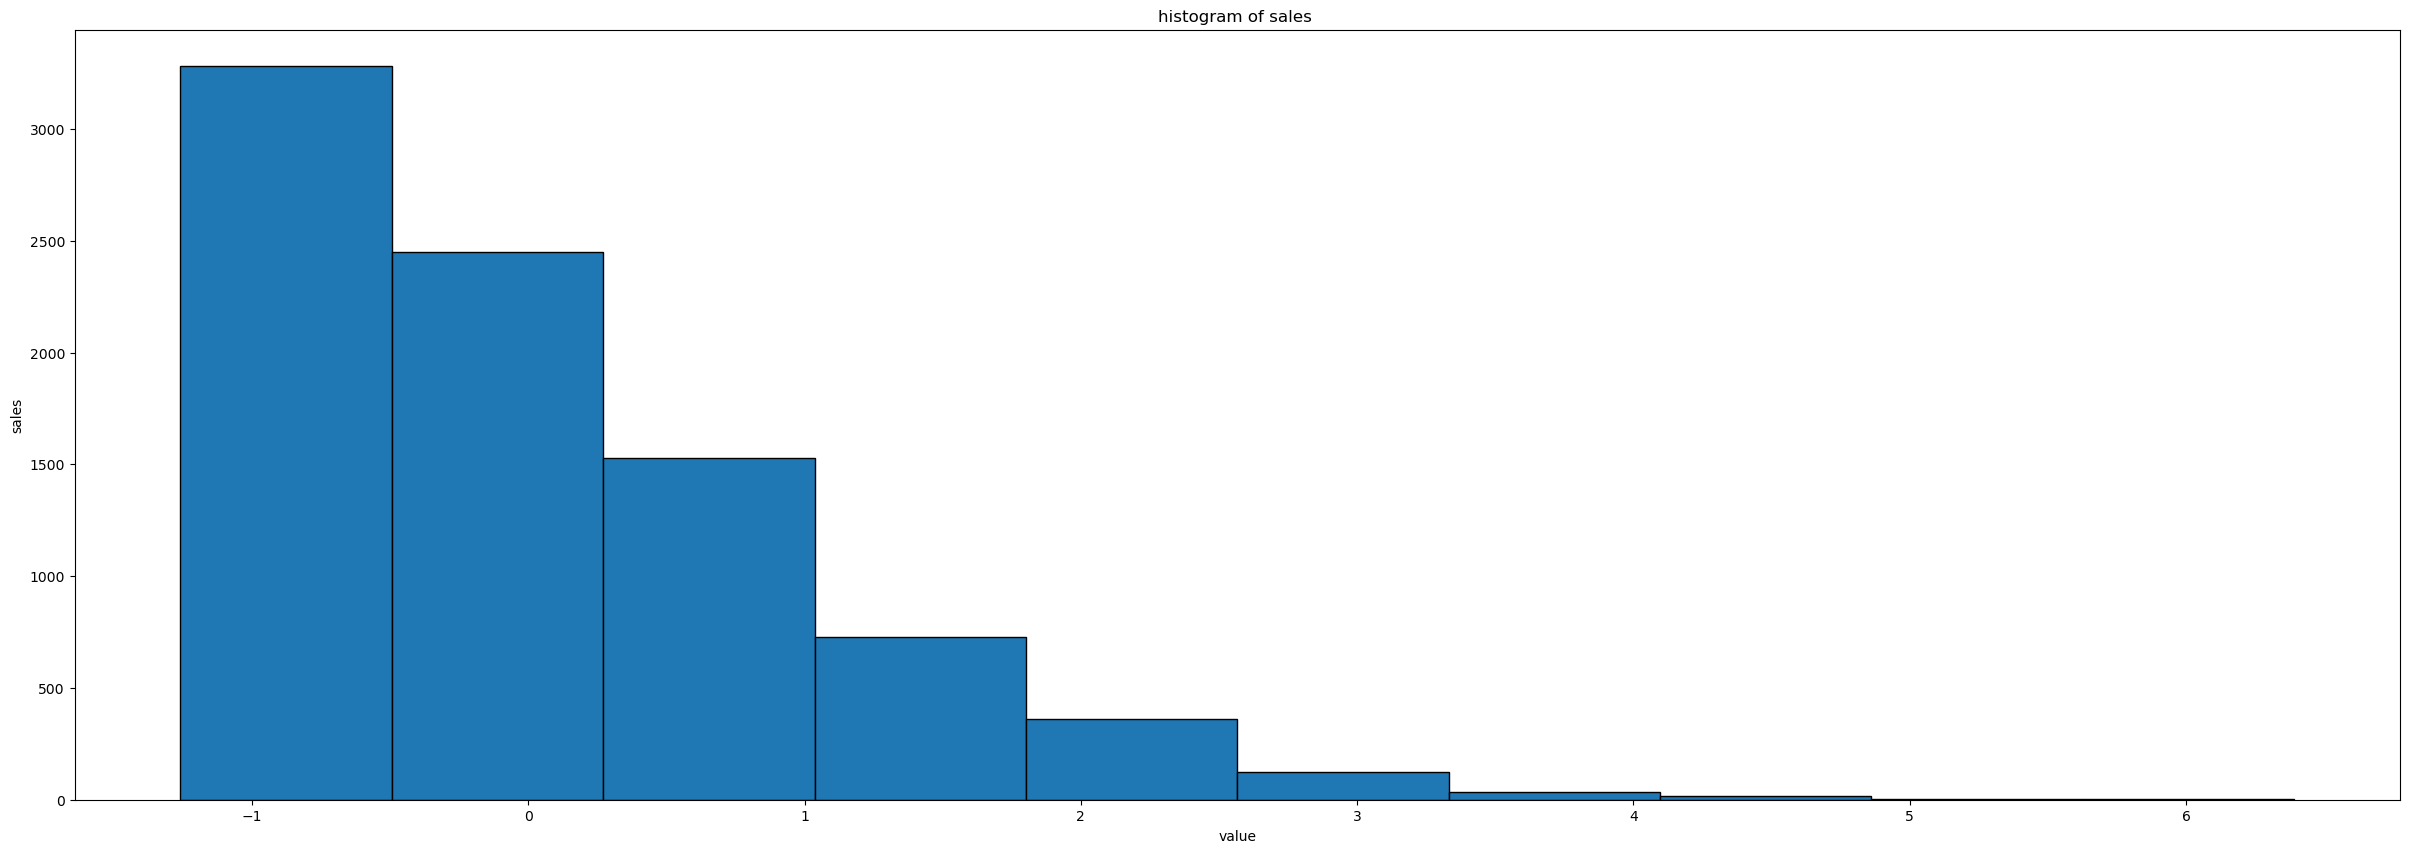

In [389]:
draw_histogram('Item_Outlet_Sales','histogram of sales ','value','sales')

sales is sqeued so we will make sqrt transformation to normalize it

(array([189., 538., 793., 753., 598., 400., 181.,  51.,  17.,   3.]),
 array([0.01775106, 0.26878111, 0.51981117, 0.77084122, 1.02187128,
        1.27290133, 1.52393139, 1.77496144, 2.0259915 , 2.27702155,
        2.52805161]),
 <BarContainer object of 10 artists>)

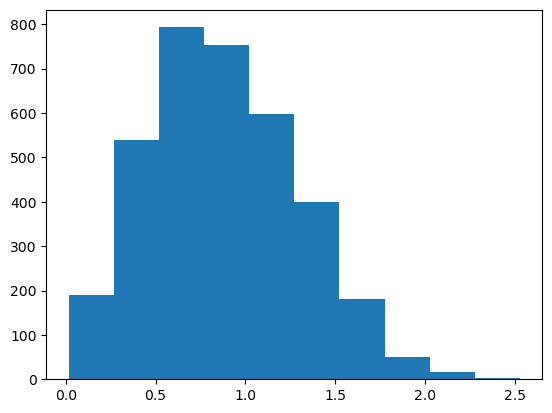

In [390]:
plt.hist(df.Item_Outlet_Sales**(1/2))

Normal distrbution 

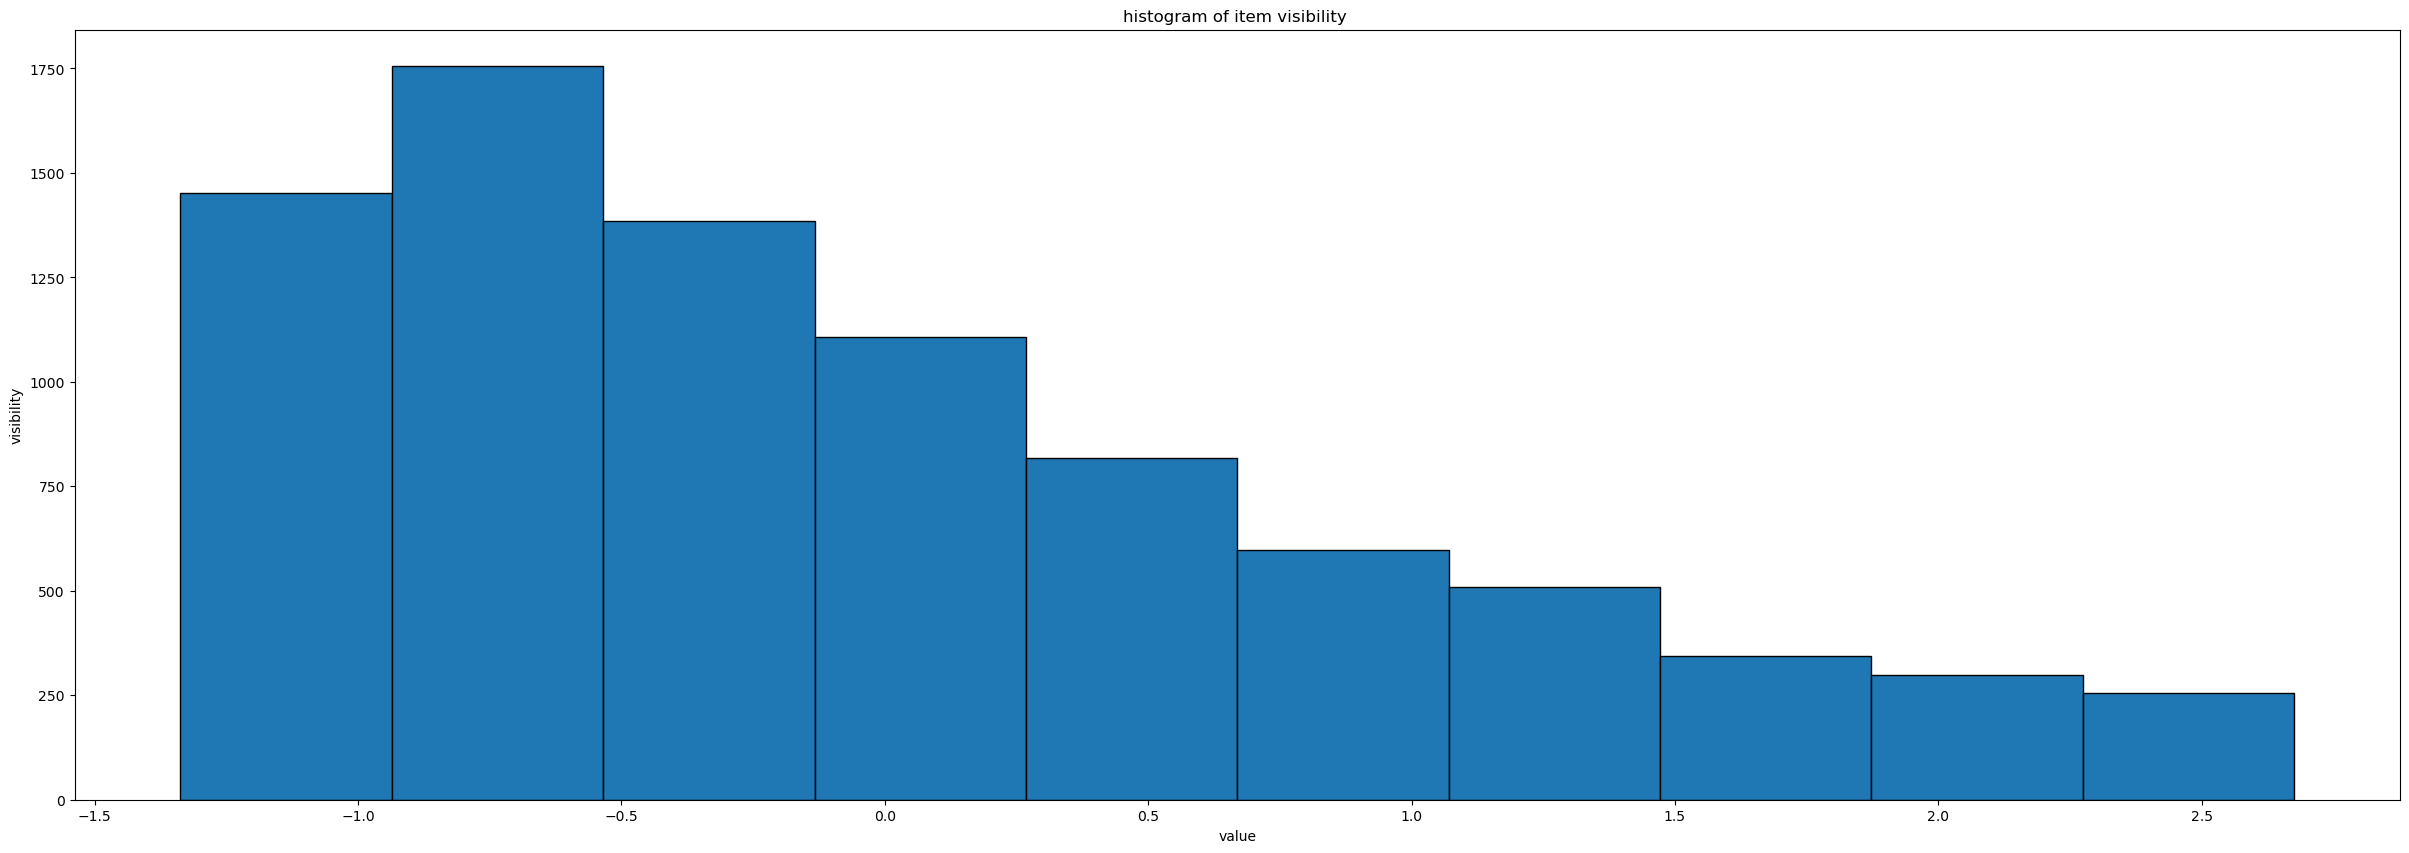

In [391]:
draw_histogram('Item_Visibility','histogram of item visibility ','value','visibility')

(array([ 96., 194., 418., 405., 467., 452., 500., 380., 322., 341.]),
 array([0.01111175, 0.17357334, 0.33603493, 0.49849652, 0.66095811,
        0.8234197 , 0.98588128, 1.14834287, 1.31080446, 1.47326605,
        1.63572764]),
 <BarContainer object of 10 artists>)

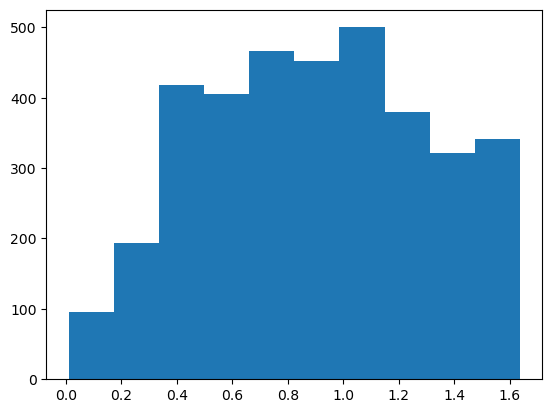

In [392]:
plt.hist(df.Item_Visibility**(1/2))

In [393]:
df.drop(labels = ['Item_Identifier','Outlet_Identifier'], axis=1, inplace = True)

8-Categorical Data Encoding:

In [394]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.841872,Low Fat,-1.008628,Dairy,1.747454,1999,Medium,Tier 1,Supermarket Type1,0.910601
1,-1.641706,Regular,-0.942473,Soft Drinks,-1.489023,2009,Medium,Tier 3,Supermarket Type2,-1.018440
2,1.098554,Low Fat,-0.994034,Meat,0.010040,1999,Medium,Tier 1,Supermarket Type1,-0.049238
3,1.500838,Regular,-1.337208,Fruits and Vegetables,0.660050,1998,NULL,Tier 3,Grocery Store,-0.849103
4,-0.929428,Low Fat,-1.337208,Household,-1.399220,1987,High,Tier 3,Supermarket Type1,-0.695373


In [395]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [396]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [397]:
df['Outlet_Size'].unique()

array(['Medium', 'NULL', 'High', 'Small'], dtype=object)

In [398]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [399]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [400]:
df["Item_Fat_Content"] = np.where(df["Item_Fat_Content"].str.contains("Regular"), 1, 0)
cleaning_dict = {
              "Outlet_Size":{ 'Medium': 1, 'High': 2 , 'Small':0},
              "Outlet_Type": {'Supermarket Type1': 1, 'Supermarket Type2': 2,'Grocery Store': 4, 'Supermarket Type3': 3},
              "Outlet_Location_Type":{'Tier 1':1 , 'Tier 2':2, 'Tier 3':3}
              }
df = df.replace(cleaning_dict)

In [401]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Item_Type']= label_encoder.fit_transform(df['Item_Type'])
df['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [402]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.841872,0,-1.008628,4,1.747454,1999,1,1,1,0.910601
1,-1.641706,1,-0.942473,14,-1.489023,2009,1,3,2,-1.018440
2,1.098554,0,-0.994034,10,0.010040,1999,1,1,1,-0.049238
3,1.500838,1,-1.337208,6,0.660050,1998,NULL,3,4,-0.849103
4,-0.929428,0,-1.337208,9,-1.399220,1987,2,3,1,-0.695373


In [403]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64